<a href="https://colab.research.google.com/github/kanchanrai97/PCOS-Detection/blob/main/PCOS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Data Collection
The dataset was collected from Kaggle website.
[cltr+click](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?resource=download)

### Importing Libraries and Dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('/content/PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


## Step 2: Data Preprocessing

* Unwanted spaces were removed from feature names
* Dealt with missing values
* Exploratory data analysis was performed twice before and after data conversion







In [3]:
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [4]:
#removingunwanted spaces
columns = [' '.join(col.strip().split()) for col in df.columns]
print(df.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [5]:
df.columns = columns
df.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  540 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [7]:
#removing unwantend columns
df.drop('Unnamed: 44', axis=1, inplace=True)

In [8]:
# checking null values
df.isna().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


"Marraige Status (Yrs)" and "Fast Food (Y/N)" both had 1 missing values that were resolved by filling with mean and mode respectively

In [9]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [10]:
df['Fast food (Y/N)'].value_counts()

,count
Fast food (Y/N),
1.0,278
0.0,262


In [11]:
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

<ipython-input-11-31f6926e3ada>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)


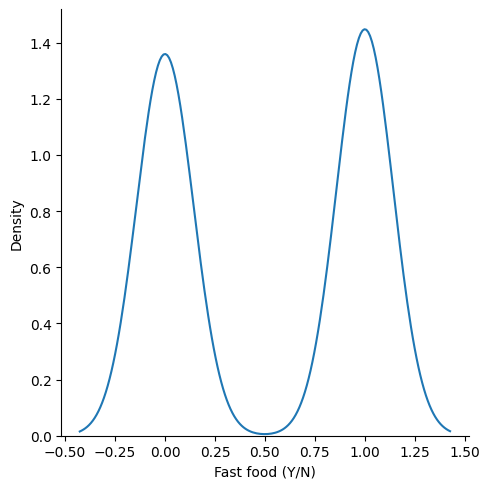

In [12]:
sns.displot(df['Fast food (Y/N)'], kind='kde')

In [13]:
df['Marraige Status (Yrs)'].value_counts()

,count
Marraige Status (Yrs),
4.0,52
3.0,51
8.0,48
5.0,47
10.0,44
7.0,43
6.0,38
2.0,29
12.0,29


In [14]:
df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mean(), inplace=True)

<ipython-input-14-5fe12faab6e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mean(), inplace=True)


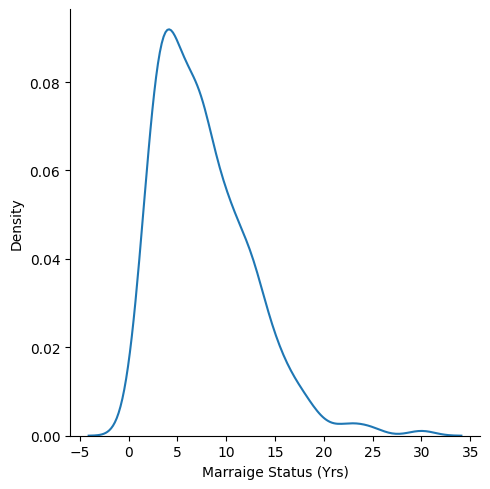

In [15]:
sns.displot(df['Marraige Status (Yrs)'], kind='kde')

In [16]:
#rechecking null values
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


Exploratory Data Analysis I
* 541 rows and 44 columns are present on the dataset#
* out of 44 features, "II beta-HCG(mIU/mL)" and "AMH(ng/mL)" are only object data types.
* Feature Marriage years is left skewed and so we replace the null values by meadian
* Only two null values are present out of all the features
* "1.99." was found to be invalid in "II beta-HCG(mIU/mL)"
* "a" was found to be invalid in "AMH(ng/mL)"



In [17]:
# finding unique values of "II beta-HCG(mIU/mL)" column
df["II beta-HCG(mIU/mL)"].unique()

array([1.99, 494.08, 801.45, 100.51, 158.51, 1214.23, 91.55, 749.98,
       218.65, 13, 610.63, 4490.18, 11.24, 15, 768.03, 12, 10, 20, 30.66,
       1455, 497.41, 167, 9.83, 141.06, 528.5, 177.57, 65.03, 173.66,
       161.49, 3.98, 756.61, 255.02, 273.7, 14.46, 145.89, 100.09, 110.17,
       174.37, 75.51, 3893.06, 600.23, 3350.19, 97.63, 14.4, 2, 177.58,
       12.17, 25.3, 100.2, 479.66, 1.9, 586.06, '1.99.', 2.8, 15.36,
       54.08, 152.13, 3.05, 201.36, 16069.69, 57.08, 232.71, 23.5, 180.3,
       102.3, 481.3, 563.8, 4.32, 230.5, 155.3, 3.888, 523.6, 1.65, 3.83,
       569.1, 236.5, 896.6, 2.58, 569.3, 108.66, 3.99, 121.8, 122.58,
       355.28, 122.3, 596.2, 588.7, 147.6, 12.37, 144.63, 475.04, 515.53,
       99.69, 70.42, 342.91, 148.52, 272.78, 355.51, 150.91, 391.46,
       464.12, 41.77, 1390.58, 213.83, 45.9, 18.36, 154.48, 25000, 638.52,
       4.76, 18.13, 89.34, 366.04, 14.34, 75.62, 4.96, 1134.4, 785.95,
       229.86, 3.9, 297.21, 277.28, 783.36, 21084.21, 409.85, 41

In [18]:
# replacing "1.99." by "1.99"
df["II beta-HCG(mIU/mL)"] = df["II beta-HCG(mIU/mL)"].replace("1.99.", "1.99")

In [19]:
# finding unique values of "AMH(ng/mL)" column
df["AMH(ng/mL)"].unique()

array([2.07, 1.53, 6.63, 1.22, 2.26, 6.74, 3.05, 1.54, 1, 1.61, 4.47,
       1.67, 7.94, 2.38, 0.88, 0.69, 3.78, 1.92, 2.85, 2.13, 4.13, 2.5,
       1.89, 0.26, 3.84, 3.56, 1.56, 1.69, 2.34, 1.58, 2.36, 3.64, 2.78,
       0.33, 2.35, 3.88, 3.55, 4.33, 3.66, 4.5, 3.2, 2.1, 6.55, 1.2, 2.33,
       3.22, 2.333, 2.31, 4.2, 3.21, 2.14, 2.3, 4.6, 5.8, 5.2, 4.63, 1.01,
       2.58, 0.35, 5.23, 3.68, 2.55, 4.91, 1.03, 6.56, 3.91, 5.42, 1.65,
       2.06, 1.81, 3.81, 3.65, 8.98, 1.7, 3.18, 2.75, 0.86, 2.29, 2.19,
       8.46, 4.59, 1.04, 4.27, 3.86, 1.42, 10.07, 0.98, 4.07, 3.9, 10,
       16.9, 17, 21.9, 1.6, 3.3, 21, 12.7, 1.8, 3.6, 15, 5, 17.9, 19.8,
       9.2, 2.4, 5.14, 0.3, 11.48, 19.3, 8.8, 19, 4.3, 1.4, 12.6, 4.8,
       17.1, 11.6, 18.4, 9.9, 3.7, 2.9, 2, 4, 15.9, 7.51, 10.04, 6.86,
       7.02, 8.75, 5.27, 9, 3.41, 0.45, 2.53, 0.29, 2.6, 2.83, 2.01, 5.67,
       1.68, 3.63, 3.49, 8, 10.25, 32, 3.38, 1.35, 5.78, 4.66, 1.99, 1.28,
       3.99, 5.69, 7.81, 6.41, 5.76, 6.65, 4.15, 1.86, 

In [20]:
# replacing "a" by "None"
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].replace("a", np.NaN)

<ipython-input-20-a9de6cb59cfc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["AMH(ng/mL)"] = df["AMH(ng/mL)"].replace("a", np.NaN)



* Invalid values were replaced and two features were converted to float values
* Integers in csv were also converted to 'int64'



In [21]:
# conversion to float
df["II beta-HCG(mIU/mL)"] = df["II beta-HCG(mIU/mL)"].astype(np.float64)

In [22]:
# conversion to float except null values
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype(np.float64)

In [23]:
# replacement of null value by median
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(), inplace=True)

<ipython-input-23-80464346a3a0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(), inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sl. No                 541 non-null    int64  
 1   Patient File No.       541 non-null    int64  
 2   PCOS (Y/N)             541 non-null    int64  
 3   Age (yrs)              541 non-null    int64  
 4   Weight (Kg)            541 non-null    float64
 5   Height(Cm)             541 non-null    float64
 6   BMI                    541 non-null    float64
 7   Blood Group            541 non-null    int64  
 8   Pulse rate(bpm)        541 non-null    int64  
 9   RR (breaths/min)       541 non-null    int64  
 10  Hb(g/dl)               541 non-null    float64
 11  Cycle(R/I)             541 non-null    int64  
 12  Cycle length(days)     541 non-null    int64  
 13  Marraige Status (Yrs)  541 non-null    float64
 14  Pregnant(Y/N)          541 non-null    int64  
 15  No. of

In [25]:
#creating datasets for modelling
unimp_cols = ['Sl. No', 'Patient File No.']
output_cols = ['PCOS (Y/N)']
imp_cols = [col for col in df.columns if col not in unimp_cols+output_cols]

## Step 3: Feature Engineering
Heatmap was used to select the important features

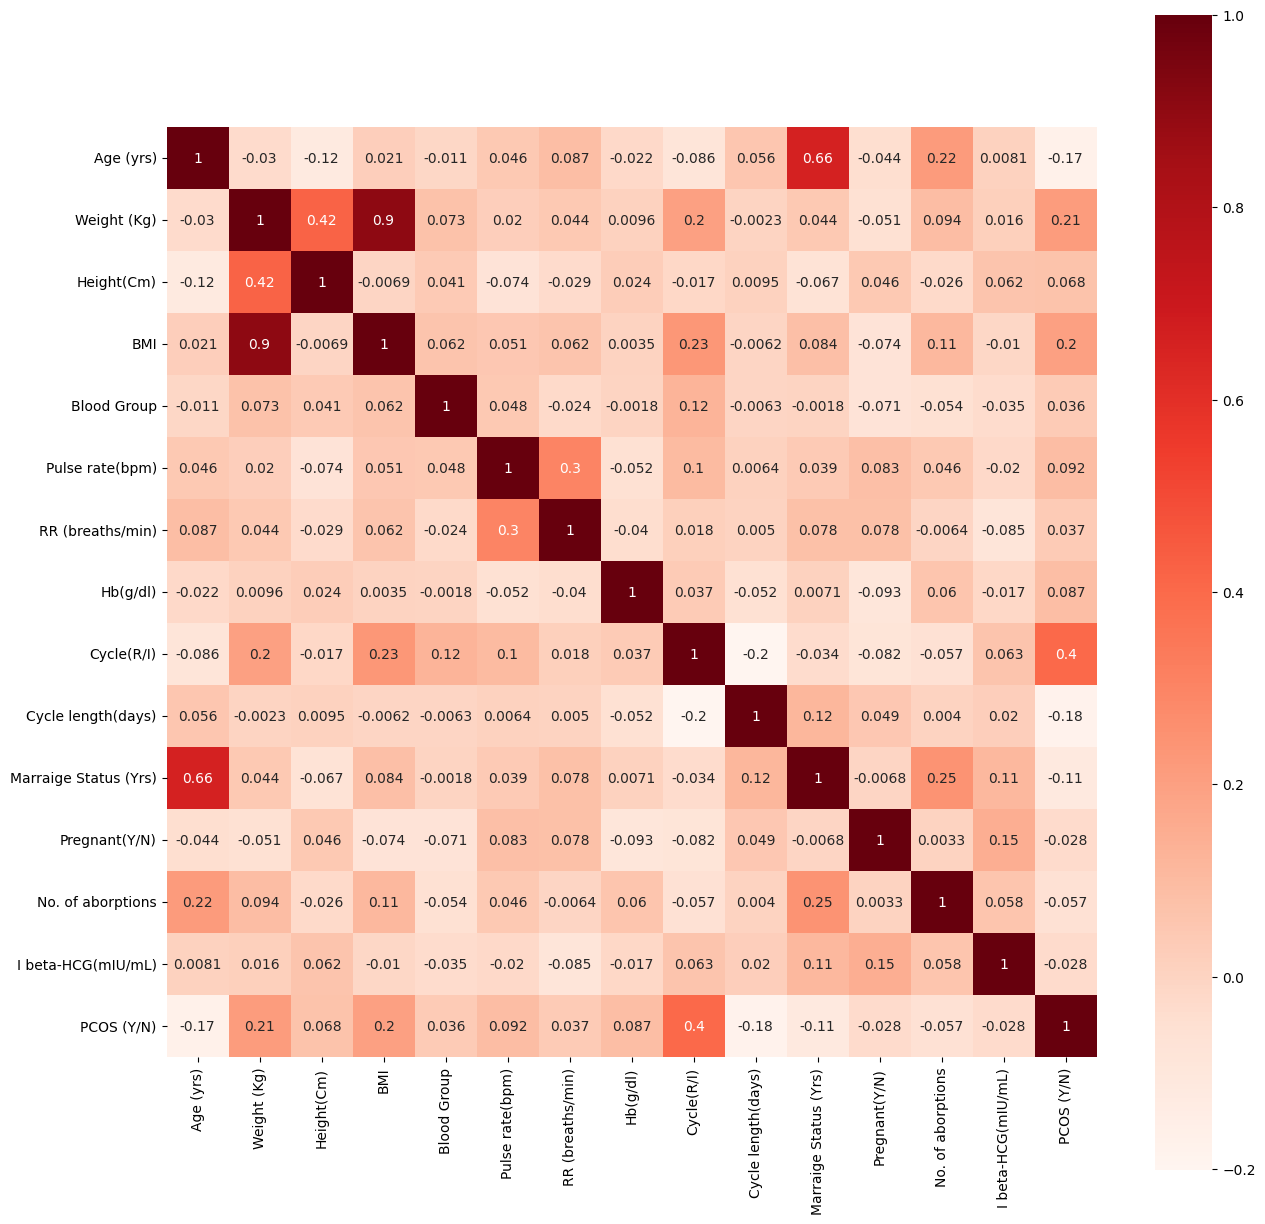

In [26]:
# heatmap to find correlation with first 14 features
df_corr = df[imp_cols[:14]+output_cols].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, square=True, cmap='Reds')
plt.show()

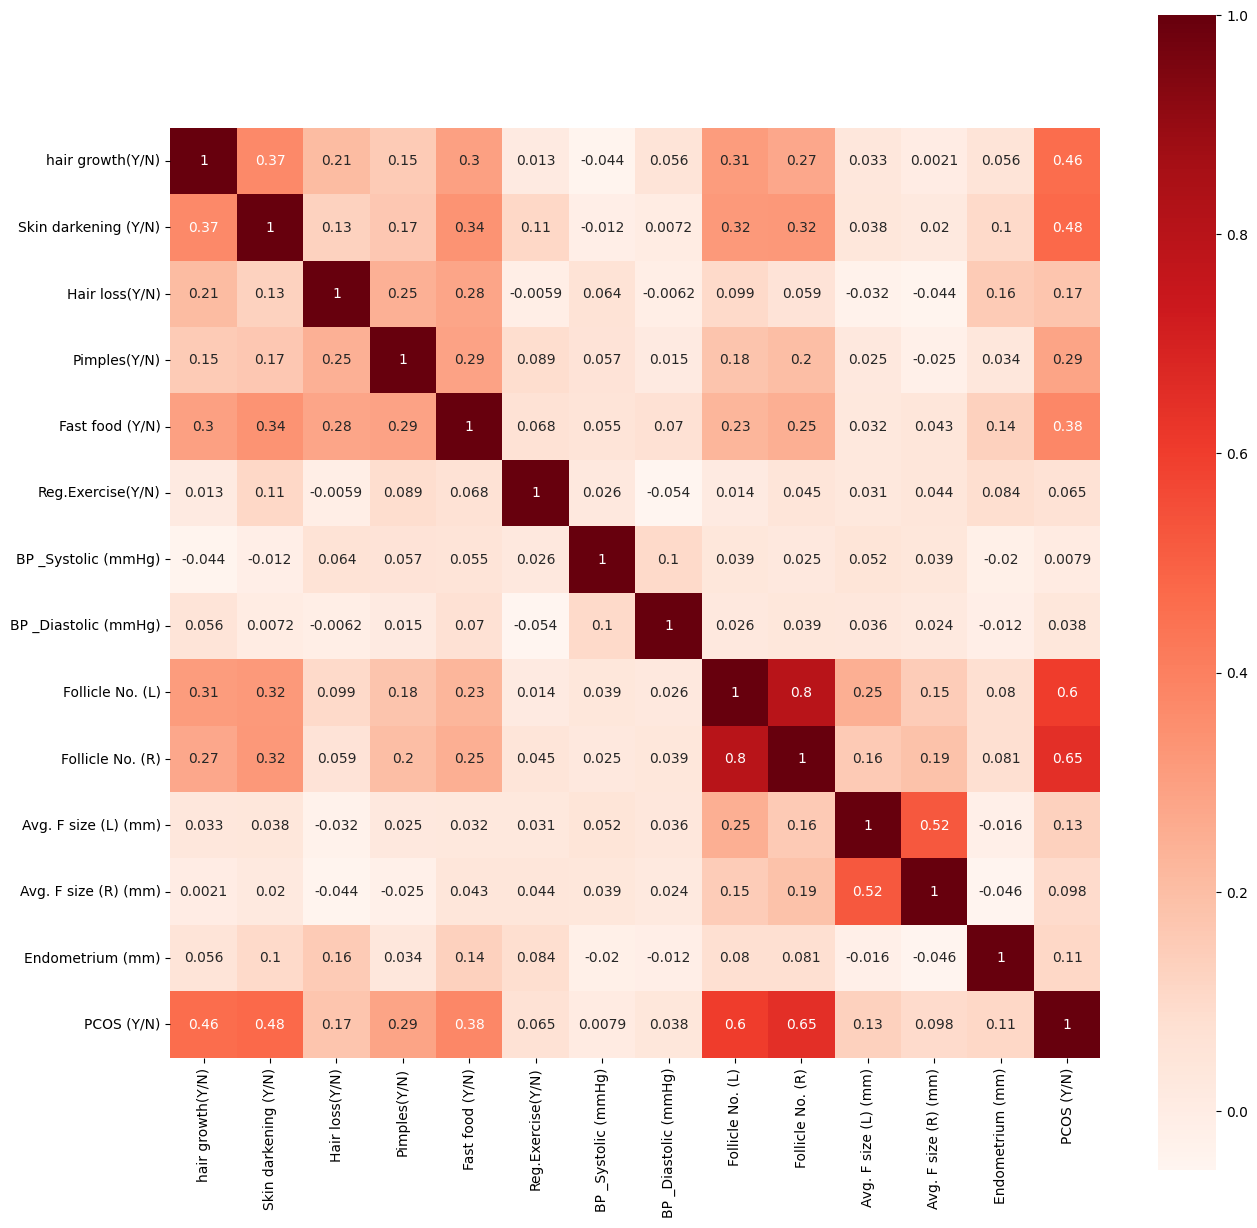

In [27]:
# heatmap to find correlation with next 14 features
df_corr = df[imp_cols[28:]+output_cols].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, square=True, cmap='Reds')
plt.show()

Features with correlation coefficient with PCOS (Y/N) greater than or equal to 0.3

hair growth(Y/N) 0.46, Skin darkening (Y/N) 0.48, Fast food (Y/N) 0.38, Follicle No. (L) 0.55, Follicle No. (R) 0.65

In [28]:
# features and output were selected
features = ['Cycle(R/I)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)', 'Follicle No. (R)']
output = output_cols[0]

## Feature Scaling
Features with value outside the range of 0 and 1 were found
MinMaxScaler was used to limit the values from 0 to 1 so in some formulas, some features have higher magnitude to effect the outcome

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [30]:
# scaler of 0 to 1 could be used only to non-binary values
for feature in features:
  print(feature)
  print(df[feature].value_counts())

Cycle(R/I)
Cycle(R/I)
2    390
4    150
5      1
Name: count, dtype: int64
Weight gain(Y/N)
Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64
hair growth(Y/N)
hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64
Skin darkening (Y/N)
Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64
Fast food (Y/N)
Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64
Follicle No. (L)
Follicle No. (L)
3     61
1     59
6     54
4     53
5     52
2     42
7     38
8     35
9     27
10    26
12    23
11    17
14    13
0     10
13     9
16     6
15     6
18     4
21     3
20     2
22     1
Name: count, dtype: int64
Follicle No. (R)
Follicle No. (R)
5     57
7     55
2     54
3     49
4     46
1     41
10    40
6     36
12    30
9     29
8     23
11    18
15    13
0     11
14    10
13     7
16     7
20     6
18     5
19     4
Name: count, dtype: int64


In [31]:
# Cycle (R/I), Follicle No. (L) and Follicle No. (R) are only taken into consideration
df[['Cycle(R/I)', 'Follicle No. (L)', 'Follicle No. (R)']] = scaler.fit_transform(df[['Cycle(R/I)', 'Follicle No. (L)', 'Follicle No. (R)']])

In [32]:
# checking all features
df[features].describe()

,Cycle(R/I),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.186691,0.377079,0.273567,0.306839,0.515712,0.278609,0.332070
std,0.300650,0.485104,0.446202,0.461609,0.500216,0.192241,0.221844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.136364,0.150000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.227273,0.300000
75%,0.666667,1.000000,1.000000,1.000000,1.000000,0.409091,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Model Training and Validation
Train and Test data were separated with stratification. Later validations were performed by confusion matrix and accuracy score

In [33]:
# train_test_split library
from sklearn.model_selection import train_test_split

# define X and y
X = df[features]
y = df[output]

# splitting data after stratification into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

Logistic Regression machine learning algorithms were implemented for modelling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [35]:
#defining model
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train, y_train)

In [37]:
# new model prediction and validation
y_predict_log = model_log.predict(X_test)
print(confusion_matrix(y_test, y_predict_log))
print(accuracy_score(y_test, y_predict_log))

[[105   5]
 [ 14  39]]
0.8834355828220859
